In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import umap
import umap.plot

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

c:\Users\이정진\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 고객별 재구매비율에 따른 class설정과 class 별 군집화
고객별 구매목록을 만들어서 군집화해보면 특정 물품을 사는 고객들의 특성을 파악할 수 있지 않을까 해서 진행하였다. 또한 고객정보에 대한 데이터가 없기 때문에 고객을 나누는 기준으로 reorder_ratio라는 지표를 만들었다.

In [5]:
reorder = pd.read_parquet('reorder_ratio.parquet',engine='fastparquet')
top10 = reorder.sort_values('reorder_ratio',ascending=False)[:10]
top10

,user_id,reorder_ratio
99752,99753,0.989637
82413,82414,0.981524
107527,107528,0.981132
17996,17997,0.979310
170173,170174,0.979167
3268,3269,0.978417
5587,5588,0.977558
91159,91160,0.976415
184516,184517,0.976190
26488,26489,0.973822


Text(0.5, 1.0, 'Top 10 Loyal Users')

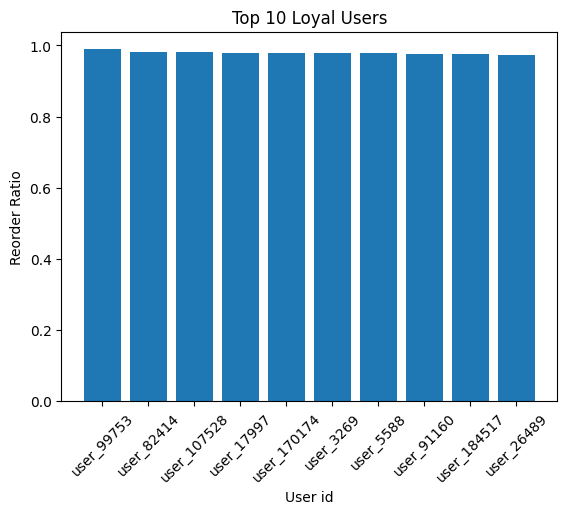

In [6]:
plt.bar('user_'+top10['user_id'].astype('str'),top10['reorder_ratio'])
plt.xlabel('User id')
plt.ylabel('Reorder Ratio')
plt.xticks(rotation=45)
plt.title('Top 10 Loyal Users')

<Axes: xlabel='reorder_ratio', ylabel='Count'>

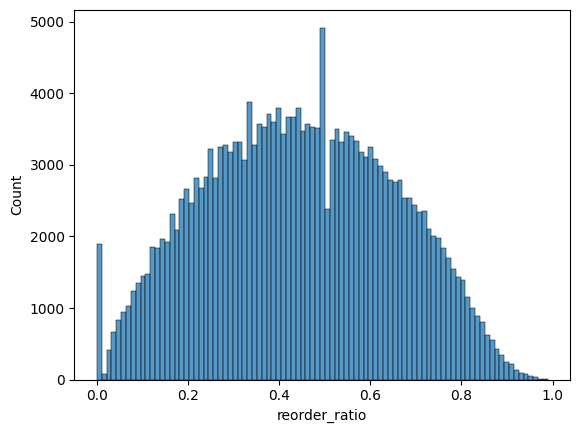

In [8]:
sns.histplot(reorder['reorder_ratio'])

In [7]:
table = pd.read_parquet('table.parquet',engine='fastparquet')
table.head()

,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,class,order_list
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,"[0% Greek Strained Yogurt, 0% Greek Strained Y..."
1,2,0,3,0,0,0,0,2,0,0,...,1,0,0,0,0,2,0,42,2,[Total 2% with Strawberry Lowfat Greek Straine...
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,[Unsweetened Chocolate Almond Breeze Almond Mi...
3,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,4,"[Organic Gala Apples, Organic Large Extra Fanc..."
4,5,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,"[Large Organic Omega3 Brown Eggs, Plain Whole ..."


<Axes: >

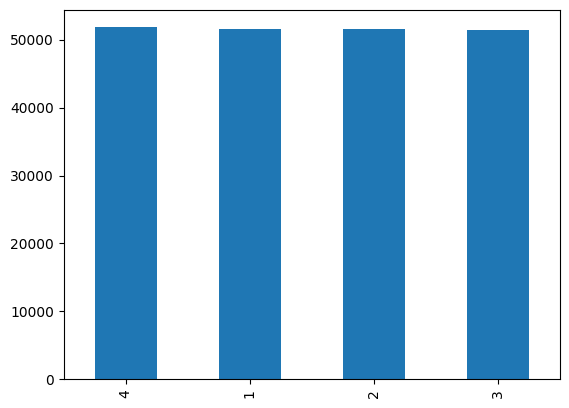

In [10]:
table['class'].value_counts().plot(kind='bar')

## 각 Class별 구매한 물품

In [19]:
df = pd.read_parquet('datasource.parquet',engine='fastparquet')
df.head()

In [21]:
class1 = df.loc[df['class']==1,'order_list']
class2 = df.loc[df['class']==2,'order_list']
class3 = df.loc[df['class']==3,'order_list']
class4 = df.loc[df['class']==4,'order_list']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bag of Organic Bananas'),
  Text(1, 0, 'Great White Bread'),
  Text(2, 0, 'Organic Strawberries'),
  Text(3, 0, 'Organic Baby Spinach'),
  Text(4, 0, 'Pure Irish Butter'),
  Text(5, 0, 'Uncured Italian Dry Salami'),
  Text(6, 0, 'Organic Hass Avocado'),
  Text(7, 0, 'Peach Pear Flavored Sparkling Water'),
  Text(8, 0, 'Peanut Butter Chocolate Chip Fruit & Nut Food Bar'),
  Text(9, 0, 'Organic Whole Milk')])

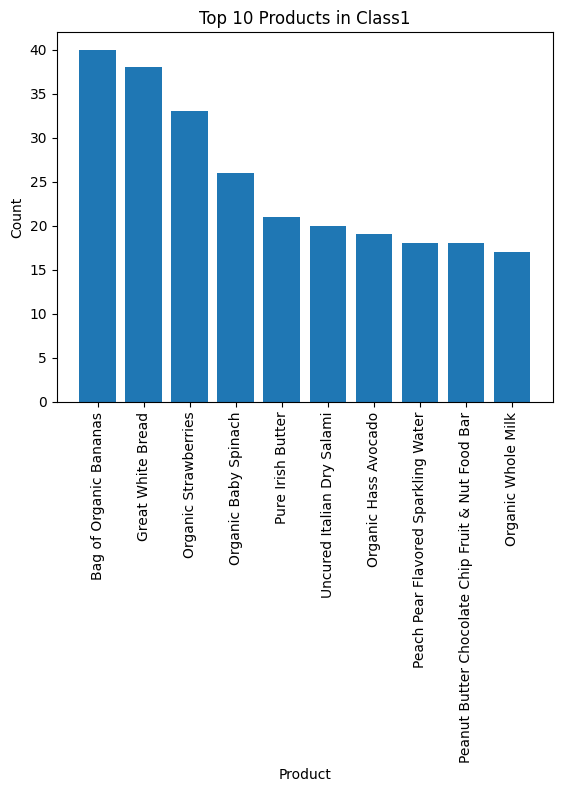

In [22]:
words1 = ''.join(str(class1.values)).split('\'')
temp = pd.DataFrame.from_dict(Counter(words1).most_common()[1:11]).rename(columns={0:'word',1:'count'})
plt.bar(temp['word'],temp['count'])
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top 10 Products in Class1')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Dark Chocolate Paso Brittle Ice Cream'),
  Text(1, 0, 'Hard Boiled Eggs'),
  Text(2, 0, 'Bag of Organic Bananas'),
  Text(3, 0, 'Sparkling Water Grapefruit'),
  Text(4, 0, 'Unsweetened Premium Iced Tea'),
  Text(5, 0, 'Banana'),
  Text(6, 0, 'Half & Half'),
  Text(7, 0, 'Organic Ginger Limeade Fruit Juice Drink'),
  Text(8, 0, 'Large Alfresco Eggs'),
  Text(9, 0, 'Organic Avocado')])

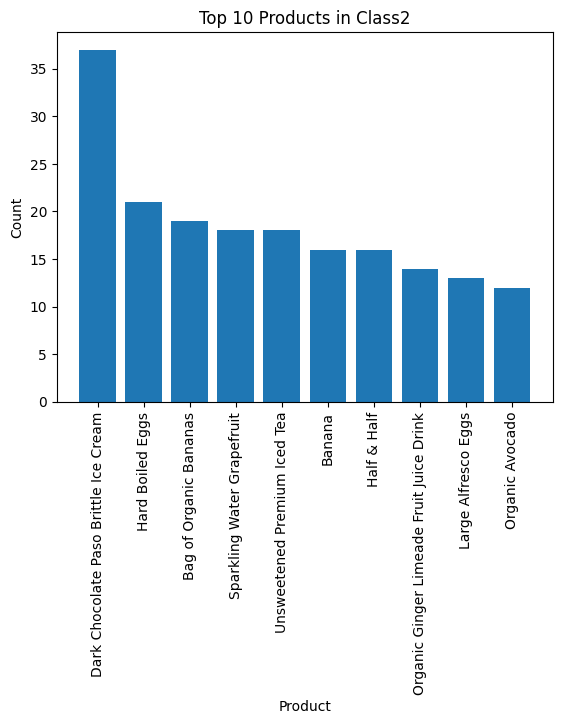

In [23]:
words2 = ''.join(str(class2.values)).split('\'')
temp = pd.DataFrame.from_dict(Counter(words2).most_common()[1:11]).rename(columns={0:'word',1:'count'})
plt.bar(temp['word'],temp['count'])
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top 10 Products in Class2')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Marble Pound Cake'),
  Text(1, 0, 'Organic Whole Kernel Sweet Corn No Salt Added'),
  Text(2, 0, 'Organic Grape Tomatoes'),
  Text(3, 0, 'Limes'),
  Text(4, 0, 'Organic Blackberries'),
  Text(5, 0, 'Goat Cheese Log'),
  Text(6, 0, 'Fresh Cauliflower'),
  Text(7, 0, 'Banana'),
  Text(8, 0, 'Organic Peach Oo La Long Tea'),
  Text(9, 0, 'Honest T Mango White Tea')])

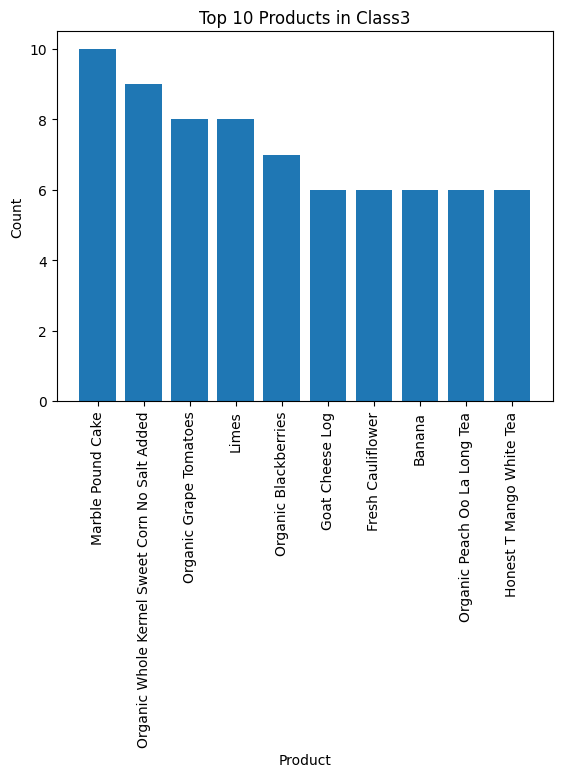

In [24]:
words3 = ''.join(str(class3.values)).split('\'')
temp = pd.DataFrame.from_dict(Counter(words3).most_common()[1:11]).rename(columns={0:'word',1:'count'})
plt.bar(temp['word'],temp['count'])
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top 10 Products in Class3')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Organic Strawberries'),
  Text(1, 0, 'Organic Baby Spinach'),
  Text(2, 0, 'Whole Grain Penne Pasta'),
  Text(3, 0, 'Carrots'),
  Text(4, 0, 'Organic Leek'),
  Text(5, 0, 'Organic Whole Milk'),
  Text(6, 0, 'Unsalted Pure Irish Butter'),
  Text(7, 0, 'Green Beans'),
  Text(8, 0, 'Garlic'),
  Text(9, 0, 'Shallot')])

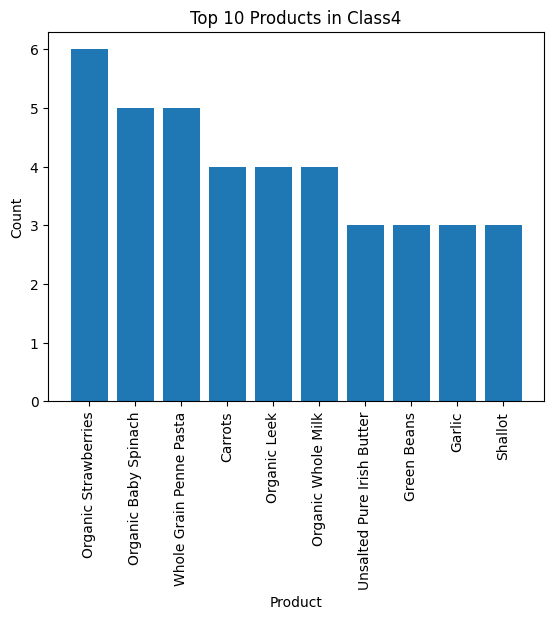

In [30]:
words4 = ''.join(str(class4.values)).split('\'')
temp = pd.DataFrame.from_dict(Counter(words4).most_common()[1:12]).rename(columns={0:'word',1:'count'})
temp=temp.drop(3, axis=0)
plt.bar(temp['word'],temp['count'])
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top 10 Products in Class4')
plt.xticks(rotation=90)

# 군집화
crosstab과 재구매율로 나누어줬던 class로 군집화를 시도해봤다.  
군집화 과정
1. crosstab을 바탕으로 scaling 후 2차원 embedding
2. class로 집단 구분

In [9]:
table

,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,class,order_list
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,"[0% Greek Strained Yogurt, 0% Greek Strained Y..."
1,2,0,3,0,0,0,0,2,0,0,...,1,0,0,0,0,2,0,42,2,[Total 2% with Strawberry Lowfat Greek Straine...
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,[Unsweetened Chocolate Almond Breeze Almond Mi...
3,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,4,"[Organic Gala Apples, Organic Large Extra Fanc..."
4,5,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,"[Large Organic Omega3 Brown Eggs, Plain Whole ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206205,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,4,"[YoKids Squeezers Organic Low-Fat Yogurt, Stra..."
206205,206206,0,4,0,0,0,0,4,1,0,...,0,0,0,1,0,1,0,0,2,"[Large Alfresco Eggs, Large Alfresco Eggs, Lar..."
206206,206207,0,0,0,0,1,0,0,0,0,...,0,2,1,0,0,11,0,15,2,"[Large Brown Eggs, Organic Large Brown Grade A..."
206207,206208,0,3,0,0,3,0,4,0,0,...,0,7,0,0,0,0,0,33,1,"[Large Alfresco Eggs, Large Alfresco Eggs, Lar..."


In [12]:
label1 = table['class']
scaled_tab1 = StandardScaler().fit_transform(table.drop(['user_id','class','order_list'],axis=1))
embedding1 = umap.UMAP(random_state=42).fit(scaled_tab1) 

<Axes: >

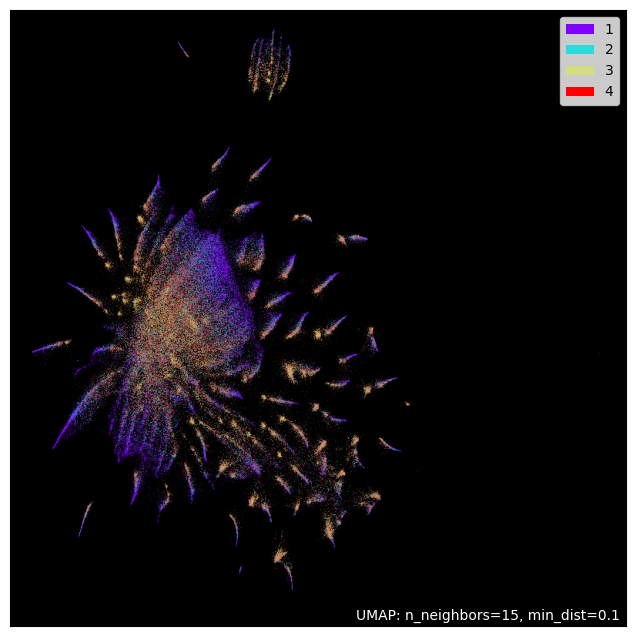

In [13]:
umap.plot.points(embedding1, label1, theme='fire')

# 전처리 파일 생성과정

## 전체 파일

In [ ]:
# data_path = os.path.join(os.getcwd(),'data')
# files = os.listdir(data_path)[:-1]

# aisles = pd.read_csv(os.path.join(data_path,files[0]), engine='pyarrow') # (134, 2)
# departments = pd.read_csv(os.path.join(data_path,files[1]), engine='pyarrow') # (21, 2)
# orders = pd.read_csv(os.path.join(data_path,files[2]), engine='pyarrow') # (3421083, 7)
# orders_products_prior = pd.read_csv(os.path.join(data_path,files[3]),engine='pyarrow') # (32434489, 4)
# orders_products_train = pd.read_csv(os.path.join(data_path,files[4]),engine='pyarrow') # (1384617, 4)
# products = pd.read_csv(os.path.join(data_path,files[5]),engine='pyarrow') # (49688, 4)

## total_orders.parquet


In [ ]:
# prior = orders[orders['eval_set']== 'prior']
# train = orders[orders['eval_set'] == 'train']
# test = orders[orders['eval_set'] == 'test']
# del train['eval_set'], test['eval_set'], prior['eval_set']

# temp = orders_products_train.set_index('order_id')
# orders_train = pd.merge(temp, train, on='order_id')

# temp = orders_products_prior.set_index('order_id')
# orders_prior = pd.merge(temp, prior, on='order_id')

# total_orders = pd.concat([orders_prior, orders_train])
# temp = pd.merge(total_orders,products , on='product_id')
# temp = pd.merge(temp, aisles, on='aisle_id')
# temp = pd.merge(temp, departments, on='department_id')

# total_orders.to_parquet('total_orders.parquet', index=False)

## reorder_ratio.parquet


In [ ]:
#temp=total_orders.groupby(['user_id']).agg({'reordered':'sum', 'user_id':'count'}).rename(columns={'user_id':'count'}).reset_index()
#temp['reorder_ratio'] = temp['reordered'] / temp['count']
#temp[['user_id','reorder_ratio']].to_parquet('reorder_ratio.parquet', index=False)

## table.parquet

In [ ]:
# temp=total_orders.groupby(['user_id']).agg({'reordered':'sum', 'user_id':'count'}).rename(columns={'user_id':'count'}).reset_index()
# temp['reorder_ratio'] = temp['reordered'] / temp['count']
# temp['class'] = pd.qcut(temp['reorder_ratio'],[0,0.25,0.5,0.75,1], labels=[4,3,2,1])


# tab1 = pd.crosstab(total_orders['user_id'], total_orders['aisle'])
# label_table = temp[['user_id','class']]
# tab1 = pd.merge(tab1,label_table, on='user_id')

# order_list = total_orders.groupby(['user_id']).product_name.apply(list).reset_index(name='order_list').set_index('user_id')['order_list']
# table = pd.merge(tab1, order_list, on='user_id')
# table.to_parquet('/content/drive/MyDrive/table.parquet',index=False)

## datasource.parquet


In [ ]:
# scaled_tab1 = StandardScaler().fit_transform(table.drop(['user_id','class','order_list'],axis=1))
# embedding1 = umap.UMAP(random_state=42).fit_transform(scaled_tab1) 
# df = pd.DataFrame(embedding1, columns = ('x','y'))
# df['user_id'] = tab1['user_id']
# df['class'] = label1
# df['order_list'] = order_list
# df.to_parquet('/content/drive/MyDrive/datasource.parquet',index=False)